In [1]:
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle

In [2]:
from fastkaggle import *

In [88]:
# for working with paths in Python, I recommend using `pathlib.Path`
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not iskaggle and not cred_path.exists():
    creds = ''
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [4]:
comp = 'playground-series-s4e8'

path = setup_comp(comp, install='fastai')

In [5]:
path

Path('playground-series-s4e8')

In [90]:
from fastai.tabular.all import *

path.ls()

(#3) [Path('playground-series-s4e8/train.csv'),Path('playground-series-s4e8/test.csv'),Path('playground-series-s4e8/sample_submission.csv')]

In [91]:
df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
df

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [92]:
df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [93]:
df.tail()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u
3116944,3116944,p,3.20,x,s,g,f,d,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,u


In [94]:
df.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [95]:
test_df.isna().sum()

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

In [96]:
df.mode().iloc[0]

id                         0
class                      p
cap-diameter            1.49
cap-shape                  x
cap-surface                t
cap-color                  n
does-bruise-or-bleed       f
gill-attachment            a
gill-spacing               c
gill-color                 w
stem-height             5.24
stem-width              2.41
stem-root                  b
stem-surface               s
stem-color                 w
veil-type                  u
veil-color                 w
has-ring                   f
ring-type                  f
spore-print-color          k
habitat                    d
season                     a
Name: 0, dtype: object

In [97]:
pd.unique(df['class'])

array(['e', 'p'], dtype=object)

In [98]:
df.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [99]:
def proc_data(df):
    modes = df.mode().iloc[0]
    df.fillna(modes, inplace=True)
    df['cap-shape'] = pd.Categorical(df['cap-shape'])
    df['cap-surface'] = pd.Categorical(df['cap-surface'])
    df['cap-color'] = pd.Categorical(df['cap-color'])
    df['does-bruise-or-bleed'] = pd.Categorical(df['does-bruise-or-bleed'])
    df['gill-attachment'] = pd.Categorical(df['gill-attachment'])
    df['gill-spacing'] = pd.Categorical(df['gill-spacing'])
    df['gill-color'] = pd.Categorical(df['gill-color'])
    df['stem-root'] = pd.Categorical(df['stem-root'])
    df['stem-surface'] = pd.Categorical(df['stem-surface'])
    df['stem-color'] = pd.Categorical(df['stem-color'])
    df['veil-type'] = pd.Categorical(df['veil-type'])
    df['veil-color'] = pd.Categorical(df['veil-color'])
    df['has-ring'] = pd.Categorical(df['has-ring'])
    df['ring-type'] = pd.Categorical(df['ring-type'])
    df['spore-print-color'] = pd.Categorical(df['spore-print-color'])
    df['habitat'] = pd.Categorical(df['habitat'])
    df['season'] = pd.Categorical(df['season'])

proc_data(df)
proc_data(test_df)

In [101]:
df

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,s,w,f,f,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,3,e,3.88,f,y,g,f,s,c,g,4.16,6.53,s,w,f,f,d,u
4,4,e,5.85,x,l,w,f,d,c,w,3.37,8.36,s,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,t,n,t,a,c,w,12.14,18.81,s,w,t,g,d,u
3116941,3116941,e,10.88,s,t,w,t,d,c,p,6.65,26.97,s,w,f,f,d,u
3116942,3116942,p,7.82,x,e,e,f,a,c,w,9.51,11.06,s,y,t,z,d,a
3116943,3116943,e,9.45,p,i,n,t,e,c,p,9.13,17.77,y,w,t,p,d,u


In [104]:
# cats=['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
cats=['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
conts=['cap-diameter', 'stem-height', 'stem-width']
dep='class'

In [105]:
df.describe(include='all')

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
count,3.116945e+06,3116945,3.116945e+06,3116945,3116945,3116945,3116945,3116945,3116945,3116945,3.116945e+06,3.116945e+06,3116945,3116945,3116945,3116945,3116945,3116945
unique,NaN,2,NaN,74,83,78,26,78,48,63,NaN,NaN,60,59,23,40,52,4
top,NaN,p,NaN,x,t,n,f,a,c,w,NaN,NaN,s,w,f,f,d,a
freq,NaN,1705396,NaN,1436066,1131800,1359554,2569751,1169970,2589489,931595,NaN,NaN,2308471,1196675,2368844,2606050,2177618,1543321
mean,1.558472e+06,NaN,6.309842e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.348333e+00,1.115379e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,8.997847e+05,NaN,4.657931e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.699755e+00,8.095477e+00,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,3.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.792360e+05,NaN,3.320000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.670000e+00,4.970000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.558472e+06,NaN,5.750000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.880000e+00,9.650000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.337708e+06,NaN,8.240000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.410000e+00,1.563000e+01,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df['cap-shape'].head()

0    f
1    x
2    f
3    f
4    x
Name: cap-shape, dtype: category
Categories (74, object): ['0.82', '1.66', '10.13', '10.46', ..., 'w', 'x', 'y', 'z']

In [107]:
df['cap-shape'].cat.codes.head()

0    53
1    71
2    53
3    53
4    71
dtype: int8

In [108]:
from sklearn.model_selection import train_test_split

trn_df,val_df = train_test_split(df, test_size=0.25)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
matthews_corrcoef(val_y, rf.predict(val_xs))

0.9817022029209946

In [110]:
sample_submission = pd.read_csv(path/'sample_submission.csv')
sample_submission

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e
...,...,...
2077959,5194904,e
2077960,5194905,e
2077961,5194906,e
2077962,5194907,e


In [111]:
test_df[cats] = test_df[cats].astype('category').apply(lambda x: x.cat.codes)
test_xs,_ = xs_y(test_df)

def subm(preds):
    test_df['class'] = preds
    sub_df = test_df[['id','class']]
    sub_df.to_csv(f'submission.csv', index=False)

subm(rf.predict(test_xs))

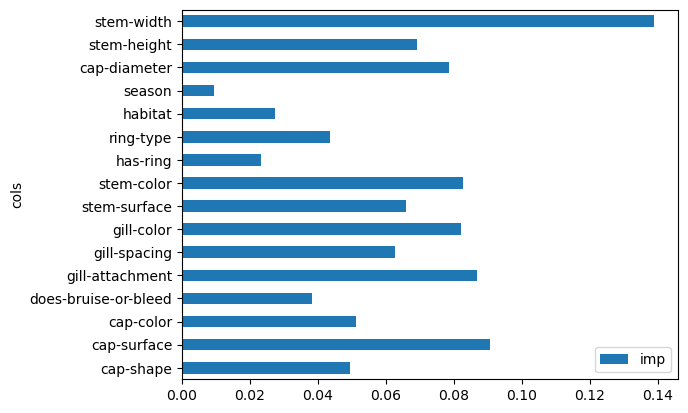

In [112]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=rf.feature_importances_)).plot('cols', 'imp', 'barh');

In [113]:
!head submission.csv

id,class
3116945,e
3116946,p
3116947,p
3116948,p
3116949,p
3116950,p
3116951,e
3116952,p
3116953,p


In [114]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('submission.csv', 'poisonous-mushrooms-03', comp)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19.8M/19.8M [00:07<00:00, 2.69MB/s]


In [115]:
if not iskaggle:
    push_notebook('alexchalk', 'poisonous-mushrooms-submission-01',
                  title='Poisonous Mushrooms Submission 01',
                  file='01.ipynb',
                  competition=comp, private=True, gpu=False)

Kernel version 1 successfully pushed.  Please check progress at https://www.kaggle.com/code/alexchalk/poisonous-mushrooms-submission-01
